# <center><h1 style="color:'blue';background-color:pink">Amazon Sales Data Analysis</h1></center>

<h1 style="color:green">By : Shalini Pal</h1>

Importing Relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing the dataset

In [2]:
raw_data = pd.read_csv("Amazon Sales data.csv",parse_dates=['Order Date','Ship Date'])

In [3]:
# Looking at the first 10 rows
raw_data.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,2011-04-27,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,2012-07-27,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,2015-08-25,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,2014-05-30,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [4]:
# Checking if there are null values
raw_data.isnull().sum() #there are no null values in the dataset

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [5]:
# Get the datatypes of each columns number of records in each column.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [6]:
# Checking for duplicated data
raw_data.duplicated().sum() #there are no duplicates values in the dataset

0

In [7]:
# There are 100 rows and 14 columns in the dataset
raw_data.shape 

(100, 14)

In [8]:
# Getting only numeric columns from the dataset.
numeric_columns = raw_data.select_dtypes(include=['float64', 'int64']).columns
raw_data_numeric = raw_data[numeric_columns]

In [9]:
raw_data_numeric.describe(include='all')

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [10]:
raw_data['Order Date'] = pd.to_datetime(raw_data['Order Date'])

Adding few new columns which will be useful in visualising the relationship better.

In [11]:
raw_data['Order Month'] = raw_data['Order Date'].dt.month
raw_data['Order Year'] = raw_data['Order Date'].dt.year
raw_data['Order Day'] = raw_data['Order Date'].dt.day
raw_data['Order Month Year'] = raw_data['Order Date'].dt.strftime('%Y-%m')
raw_data['Order Date'] = raw_data['Order Date'].dt.strftime('%Y-%m-%d')

In [12]:
raw_data['Profit Margin %']= raw_data['Total Profit']/raw_data['Total Revenue']*100

In [13]:
raw_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Day,Order Month Year,Profit Margin %
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,28,2010-05,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,22,2012-08,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2,2014-05,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,20,2014-06,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,1,2013-02,19.386987


Checking Outliers using the IQR method -

In [14]:
# Calculating the IQR (Interquartile Range) for all the numerical columns
Q1 = raw_data_numeric.quantile(0.25)
Q3 = raw_data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5

# Creating a boolean mask for outliers 
outliers_values = ((raw_data_numeric < (Q1 - threshold * IQR)) | (raw_data_numeric > (Q3 + threshold * IQR)))

# Identifying outliers
outliers = raw_data_numeric[outliers_values.any(axis=1)]

# Displaying the Original dataframe
print("Original DataFrame:")
print(raw_data)

print("\nOutliers:")
print(outliers) 

Original DataFrame:
                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sale

In [15]:
# Number of outliers
print(f"Number of Outliers : {outliers.shape[0]} ")

Number of Outliers : 7 


In [16]:
# Dropping outliers from the Original Dataframe
data_with_no_outliers = raw_data.drop(outliers.index,axis=0)

In [17]:
#Taking numreric columns from dataset with no outliers
numeric_columns = data_with_no_outliers.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data_with_no_outliers[numeric_columns]

In [18]:
correlation_matrix = numeric_data.corr()

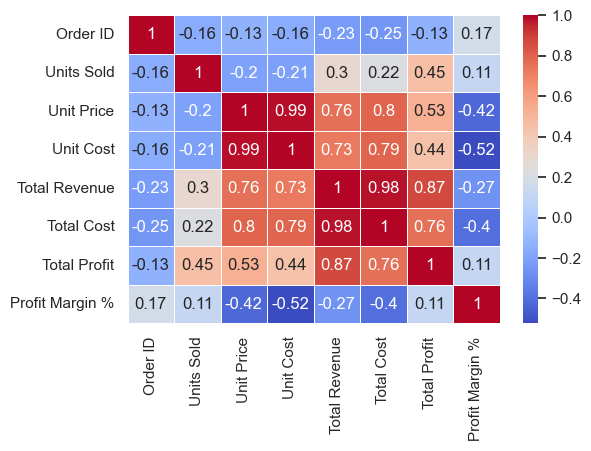

In [19]:
# Setting the figure
plt.figure(figsize=(6, 4))

# Create a heatmap using Seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

Observations:
1. Unit Price is highly related to Unit Cost,Total Revenue,Total Cost and moderately related to Total Profit
2. Unit Cost is highly related to Unit Price,Total Revenue,Total cost and moderately related to Total Profit
3. Total Revenue is highly related to Unit Price,Unit Cost,Total Cost and Total Profit
4. Total Profit is highly related to Total Revenue and Total Cost, and moderately related to Unit Price.
5. There is no relation between Units Sold and Unit Price,Unit Cost.

Count of Items Sold

In [20]:
item_type_count = data_with_no_outliers['Item Type'].value_counts()
item_type_count

Item Type
Clothes            13
Office Supplies    11
Fruits             10
Personal Care      10
Cosmetics           9
Beverages           8
Baby Food           7
Cereal              7
Household           7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

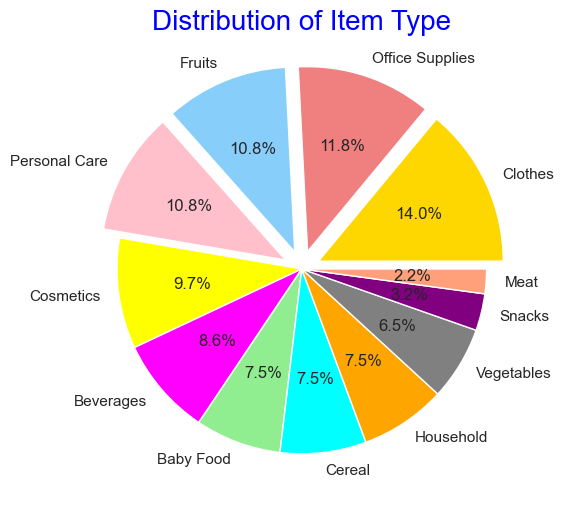

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(item_type_count, labels=item_type_count.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue','pink','yellow','magenta','lightgreen','cyan','orange','grey','purple','lightsalmon'],explode=[0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0])

plt.title('Distribution of Item Type',fontsize=20,color='blue')
plt.show()

Count of channel

In [22]:
top_20_sales = data_with_no_outliers.nlargest(20, 'Total Revenue').reset_index()
top_10_sales = data_with_no_outliers.nlargest(10, 'Total Revenue').reset_index()

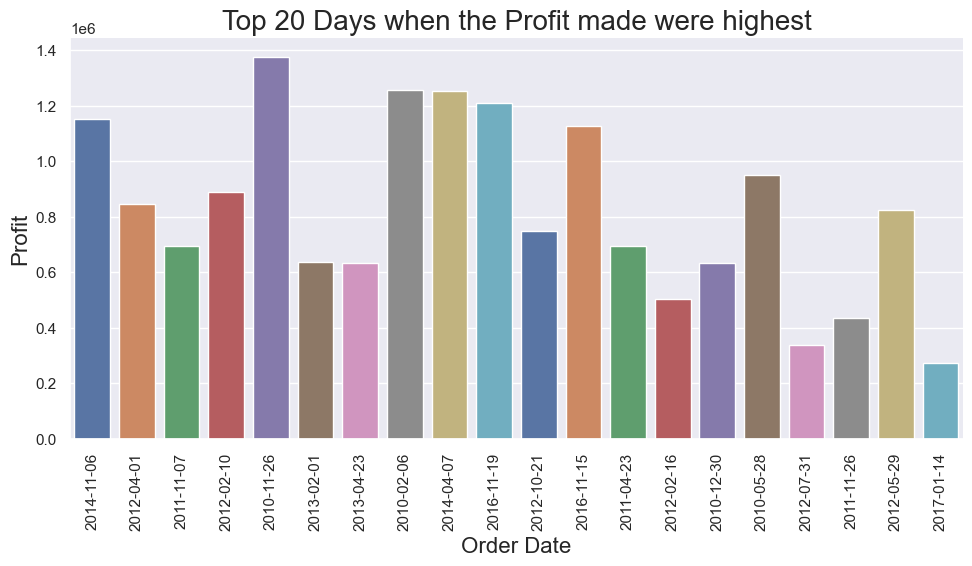

In [23]:
sns.catplot(x='Order Date', y='Total Profit', kind='bar',data=top_20_sales,palette='deep',aspect=2)
plt.title("Top 20 Days when the Profit made were highest",fontsize=20)
plt.xlabel("Order Date",fontsize='16')
plt.ylabel("Profit",fontsize='16')
plt.xticks(rotation=90)
plt.show()

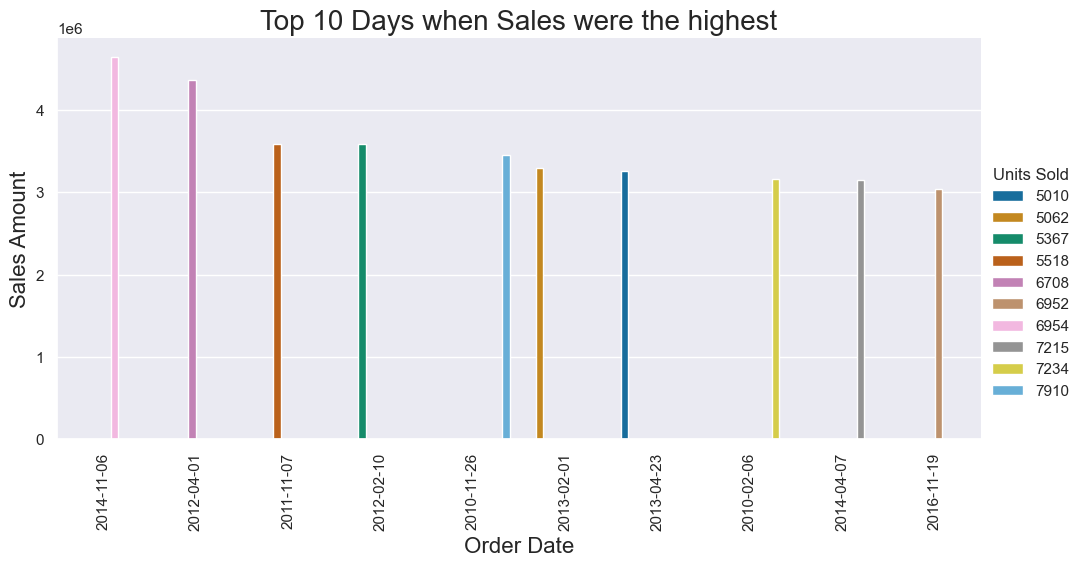

In [24]:
sns.catplot(x='Order Date', y='Total Revenue', kind='bar',data=(data_with_no_outliers.nlargest(10, 'Total Revenue')),palette='colorblind',aspect=2,hue='Units Sold')
plt.title("Top 10 Days when Sales were the highest",fontsize=20)
plt.xlabel("Order Date",fontsize='16')
plt.ylabel("Sales Amount",fontsize='16')
plt.xticks(rotation=90)
plt.show()

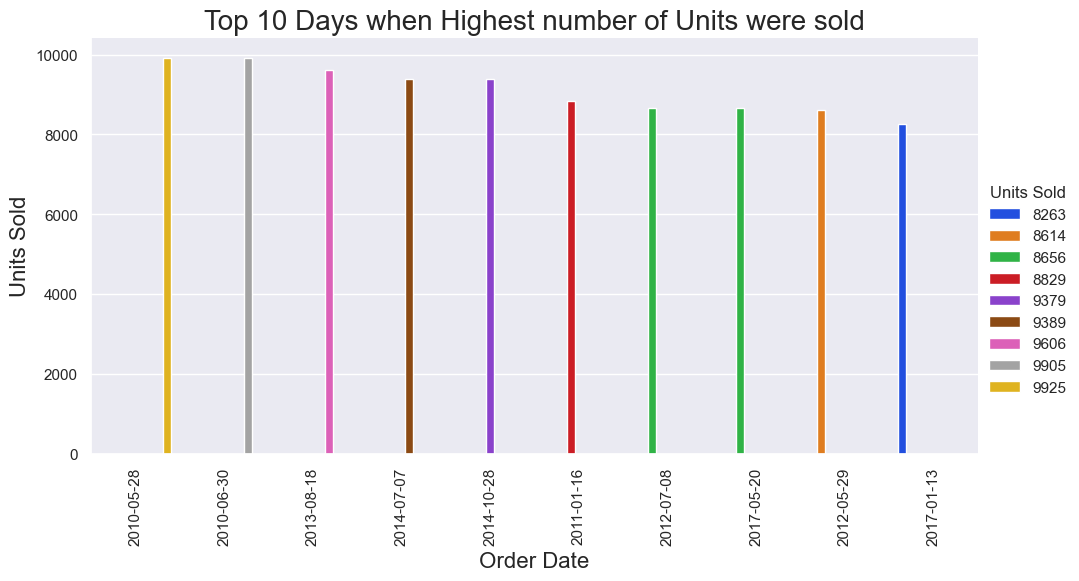

In [25]:
sns.catplot(x='Order Date', y='Units Sold', kind='bar',data=(data_with_no_outliers.nlargest(10, 'Units Sold')),palette='bright',aspect=2,hue='Units Sold')
plt.title("Top 10 Days when Highest number of Units were sold",fontsize=20)
plt.xlabel("Order Date",fontsize='16')
plt.ylabel("Units Sold",fontsize='16')
plt.xticks(rotation=90)
plt.show()

<h1 style="color:red">Regional Comparison</h1>

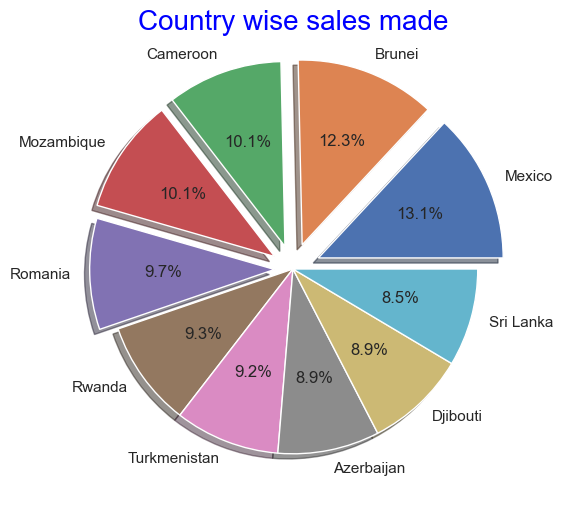

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(top_10_sales['Total Revenue'],labels=top_10_sales['Country'],autopct='%1.1f%%',shadow=True,explode=[0.15,0.14,0.13,0.12,0.1,0,0,0,0,0])

plt.title('Country wise sales made',fontsize=20,color='blue')
plt.show()

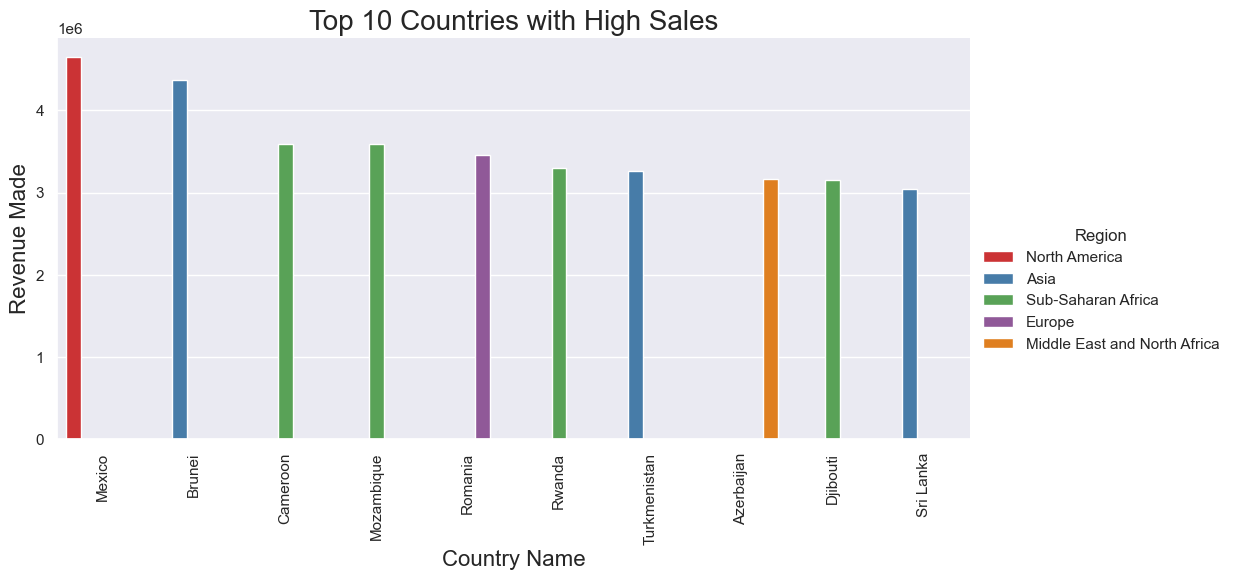

In [27]:
sns.catplot(data=top_10_sales,x='Country', y='Total Revenue', kind='bar',palette='Set1',aspect=2,hue='Region')
plt.title("Top 10 Countries with High Sales",fontsize=20)
plt.xlabel("Country Name",fontsize=16)
plt.ylabel("Revenue Made",fontsize=16)
plt.xticks(rotation=90)
plt.show()

<h1 style="color:red">Sales Trend</h1>

In [28]:
# grouping the data by order year with respect to Profit for more precise visuals
grouped_year_profit = data_with_no_outliers.groupby('Order Year')['Total Profit'].sum().reset_index()

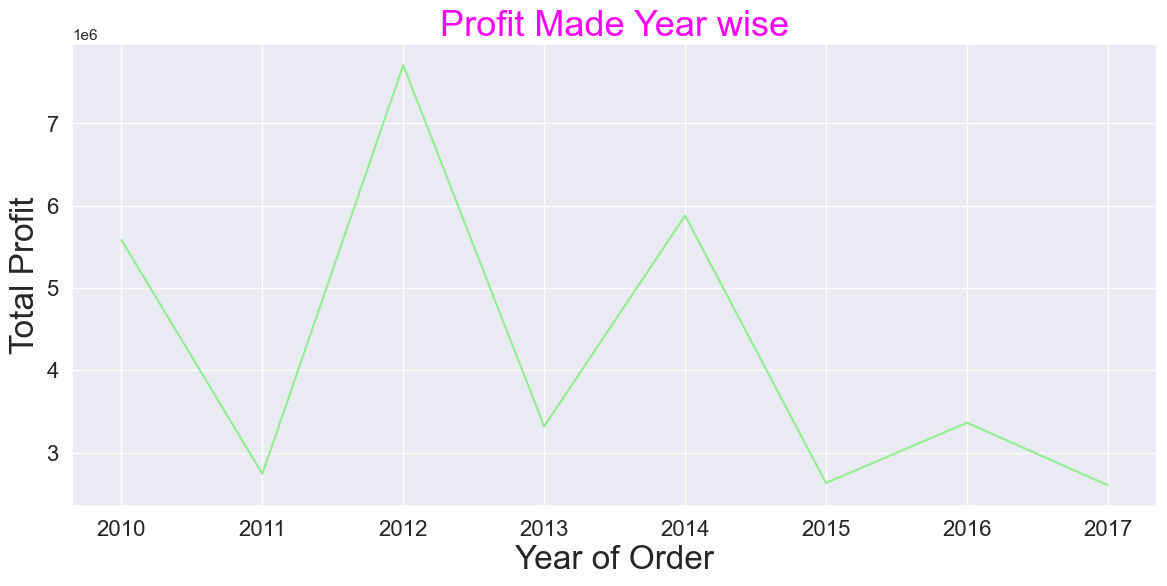

In [29]:
plt.figure(figsize=(14,6))
sns.lineplot(grouped_year_profit,x='Order Year',y='Total Profit' ,color='lightgreen')
plt.title("Profit Made Year wise",fontsize=26,color='magenta')
plt.xlabel('Year of Order',fontsize=24)
plt.ylabel('Total Profit',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [30]:
# grouping the data by order year with respect to Revenue for more precise visuals
grouped_year_revenue = data_with_no_outliers.groupby('Order Year')['Total Revenue'].sum().reset_index()

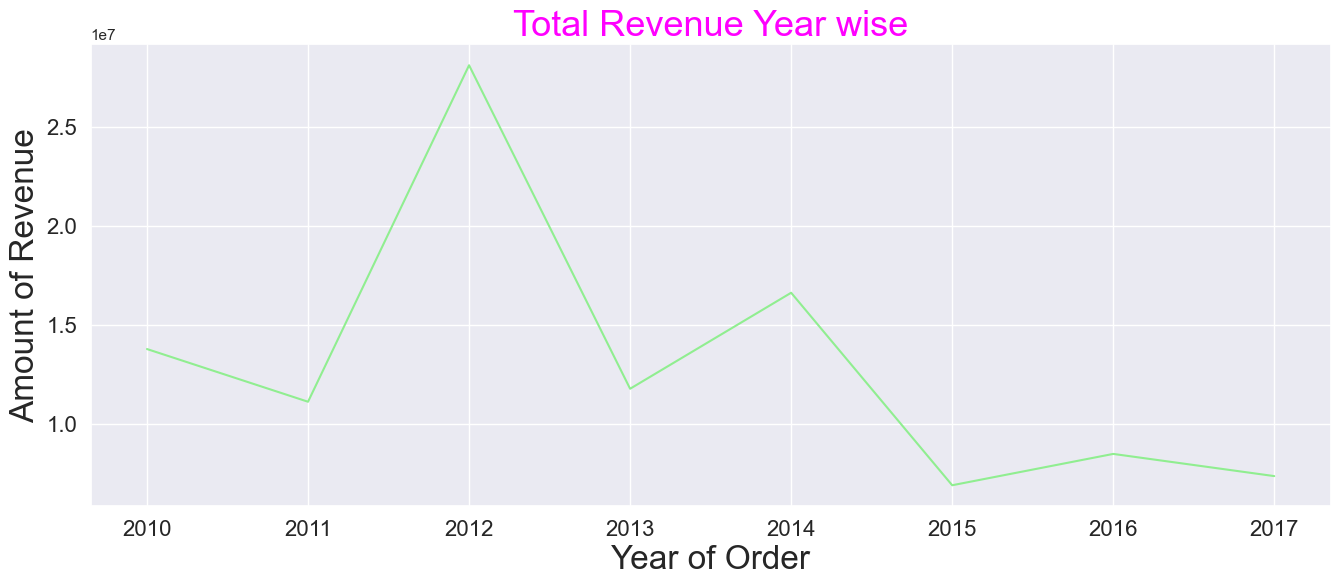

In [31]:
plt.figure(figsize=(16,6))
sns.lineplot(grouped_year_revenue,x='Order Year',y='Total Revenue' ,color='lightgreen')
plt.title("Total Revenue Year wise",fontsize=26,color='magenta')
plt.xlabel('Year of Order',fontsize=24)
plt.ylabel('Amount of Revenue',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [32]:
# grouping the data by order month with respect to Profit for more precise visuals
grouped_month_profit = data_with_no_outliers.groupby('Order Month')['Total Profit'].sum().reset_index()

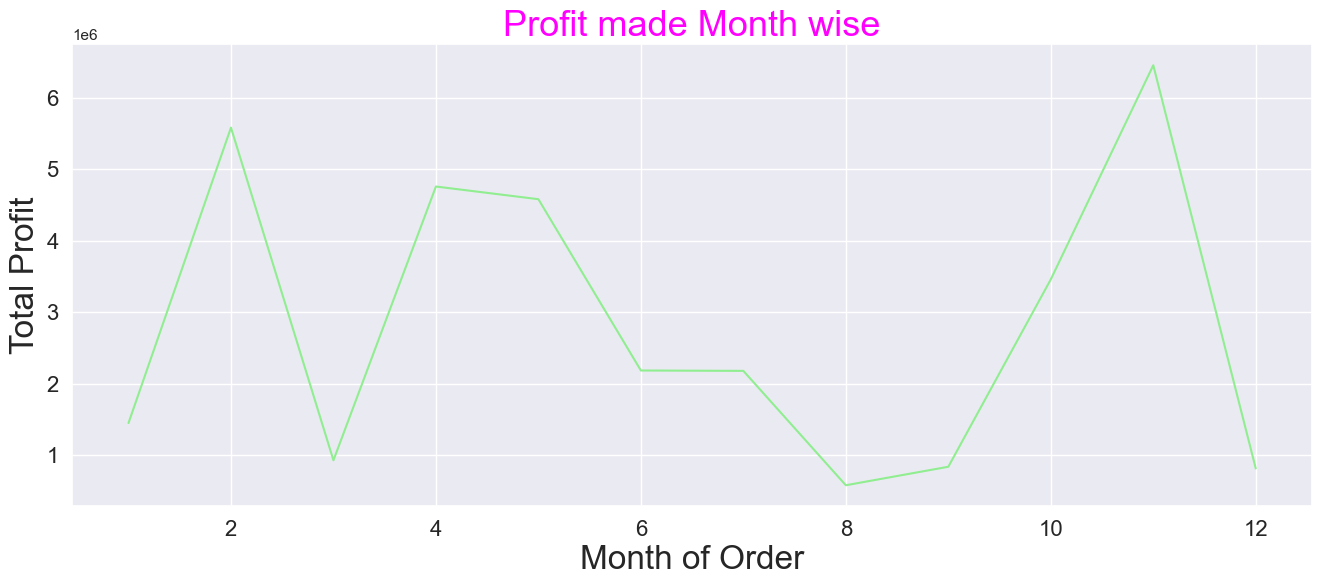

In [33]:
plt.figure(figsize=(16,6))
sns.lineplot(grouped_month_profit,x='Order Month',y='Total Profit' ,color='lightgreen')
plt.title("Profit made Month wise",fontsize=26,color='magenta')
plt.xlabel('Month of Order',fontsize=24)
plt.ylabel('Total Profit',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [34]:
# grouping the data by order month with respect to Revenue for more precise visuals
grouped_month_revenue = data_with_no_outliers.groupby('Order Month')['Total Revenue'].sum().reset_index()

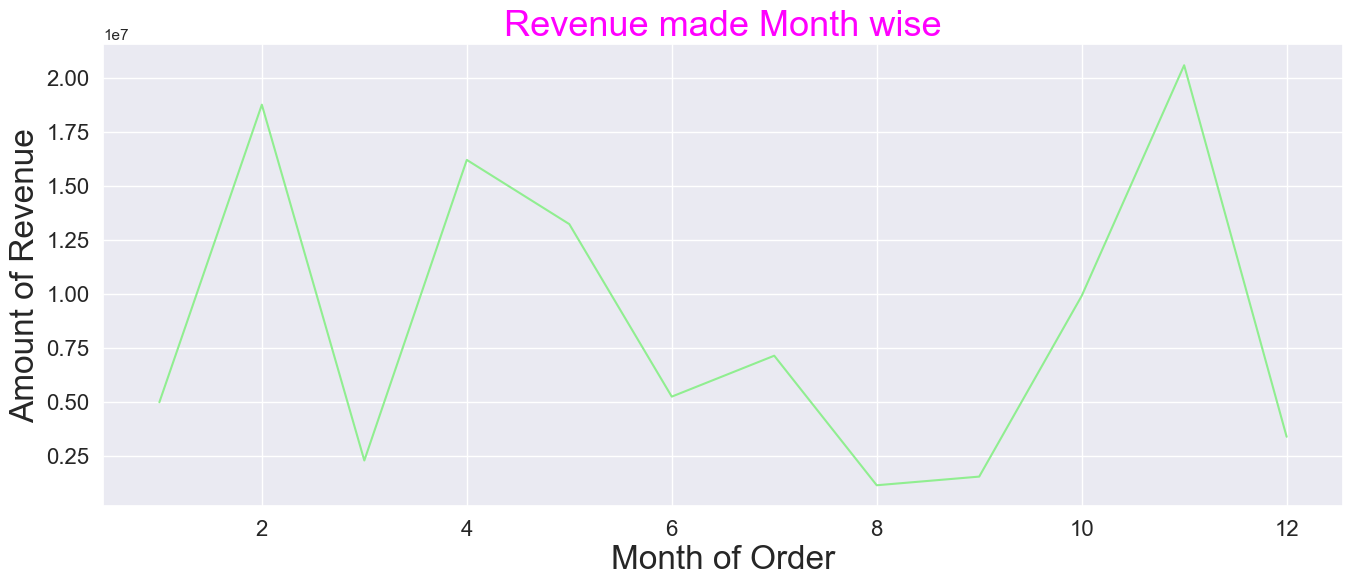

In [35]:
plt.figure(figsize=(16,6))
sns.lineplot(grouped_month_revenue,x='Order Month',y='Total Revenue',color='lightgreen')
plt.title("Revenue made Month wise",fontsize=26,color='magenta')
plt.xlabel('Month of Order',fontsize=24)
plt.ylabel('Amount of Revenue',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [36]:
# grouping the data by order month year wise with respect to Profit for more precise visuals
grouped_monthyear_profit = data_with_no_outliers.groupby('Order Month Year')['Total Profit'].sum().reset_index()

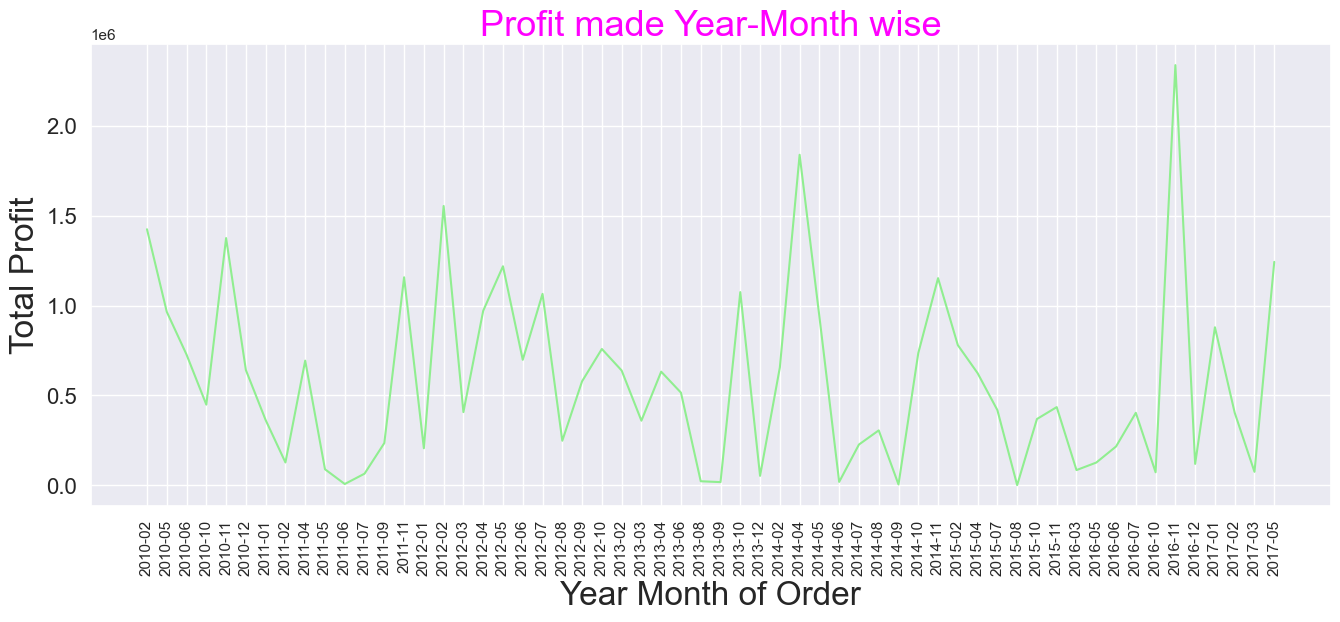

In [37]:
plt.figure(figsize=(16,6))
sns.lineplot(grouped_monthyear_profit,x='Order Month Year',y='Total Profit' ,color='lightgreen')
plt.title("Profit made Year-Month wise",fontsize=26,color='magenta')
plt.xlabel('Year Month of Order',fontsize=24)
plt.ylabel('Total Profit',fontsize=24)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.show()

In [38]:
data_with_no_outliers.sort_values(by='Profit Margin %',ascending=False)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Day,Order Month Year,Profit Margin %
67,Central America and the Caribbean,Belize,Clothes,Offline,M,2016-07-25,807025039,2016-09-07,5498,109.28,35.84,600821.44,197048.32,403773.12,7,2016,25,2016-07,67.203514
15,Europe,Bulgaria,Clothes,Online,M,2012-04-23,972292029,2012-06-03,1673,109.28,35.84,182825.44,59960.32,122865.12,4,2012,23,2012-04,67.203514
44,Asia,Myanmar,Clothes,Online,H,2015-11-14,223359620,2015-11-18,5930,109.28,35.84,648030.40,212531.20,435499.20,11,2015,14,2015-11,67.203514
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,26,2011-07,67.203514
48,Europe,Macedonia,Clothes,Offline,C,2014-10-14,787399423,2014-11-14,7842,109.28,35.84,856973.76,281057.28,575916.48,10,2014,14,2014-10,67.203514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Sub-Saharan Africa,Mauritania,Office Supplies,Offline,C,2012-01-11,837559306,2012-01-13,1266,651.21,524.96,824431.86,664599.36,159832.50,1,2012,11,2012-01,19.386987
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2,2014-05,19.386987
39,Europe,Bulgaria,Office Supplies,Online,M,2012-02-16,189965903,2012-02-28,3987,651.21,524.96,2596374.27,2093015.52,503358.75,2,2012,16,2012-02,19.386987
37,Sub-Saharan Africa,The Gambia,Meat,Online,M,2017-01-14,825304400,2017-01-23,4767,421.89,364.69,2011149.63,1738477.23,272672.40,1,2017,14,2017-01,13.558036


In [39]:
# grouping the data by order month year wise with respect to Sales for more precise visuals
grouped_monthyear_revenue = data_with_no_outliers.groupby('Order Month Year')['Total Revenue'].sum().reset_index()

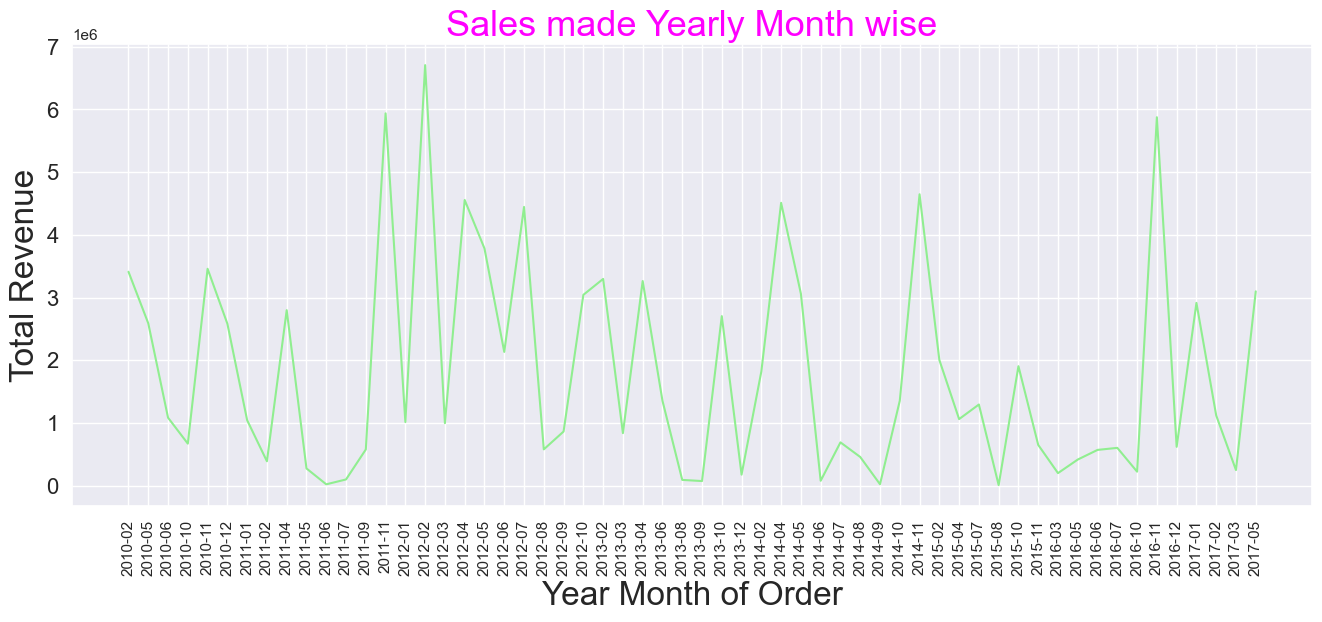

In [40]:
plt.figure(figsize=(16,6))
sns.lineplot(grouped_monthyear_revenue,x='Order Month Year',y='Total Revenue' ,color='lightgreen')
plt.title("Sales made Yearly Month wise",fontsize=26,color='magenta')
plt.xlabel('Year Month of Order',fontsize=24)
plt.ylabel('Total Revenue',fontsize=24)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.show()

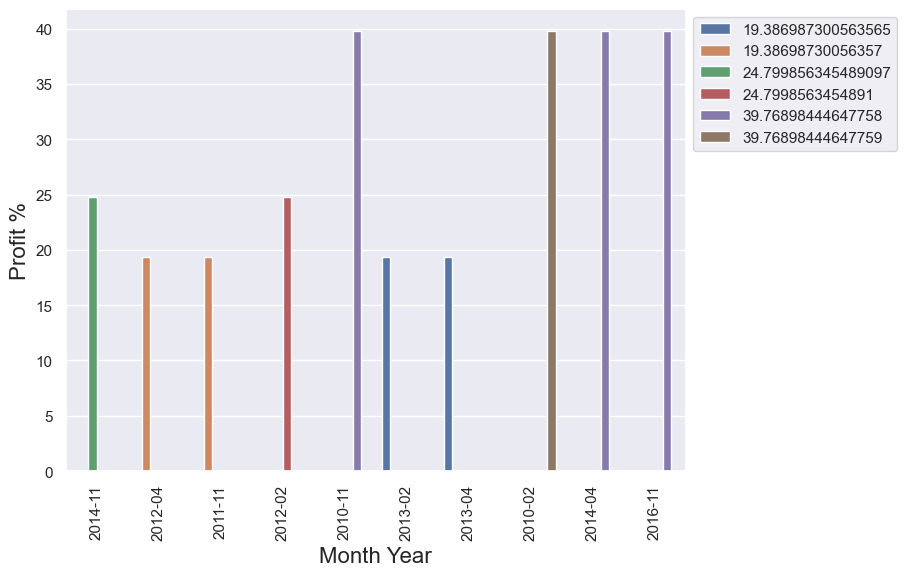

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_10_sales,x='Order Month Year',y='Profit Margin %',hue='Profit Margin %')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Month Year',fontsize=16)
plt.ylabel('Profit %',fontsize=16)
plt.xticks(rotation=90)
plt.show()

<h1 style="color:red">Sales Channel Comparison</h1>

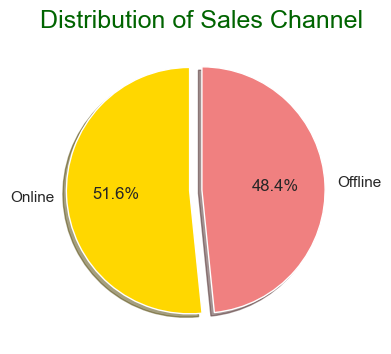

In [42]:
# Count the occurrences of each order priority
priority_counts = data_with_no_outliers['Sales Channel'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(priority_counts, labels=priority_counts.index, shadow=True,autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral'],explode=[0.1,0])

# Add title
plt.title('Distribution of Sales Channel',fontsize=18,color='darkgreen')

# Show the plot
plt.show()

Sales channel Comparison by Profit

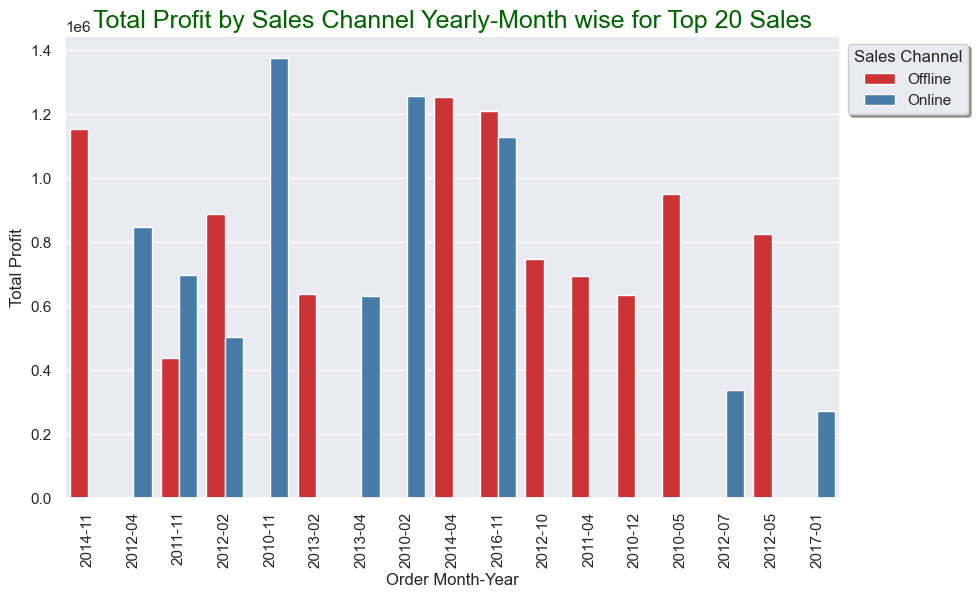

In [43]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Order Month Year', y='Total Profit', hue='Sales Channel', data=top_20_sales,palette='Set1')

plt.xlabel('Order Month-Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Sales Channel Yearly-Month wise for Top 20 Sales',fontsize=18,color='darkgreen')

plt.xticks(rotation=90)
plt.legend(title='Sales Channel',bbox_to_anchor=(1,1),shadow=True)

plt.show()

Sales channel Comparison by Revenue

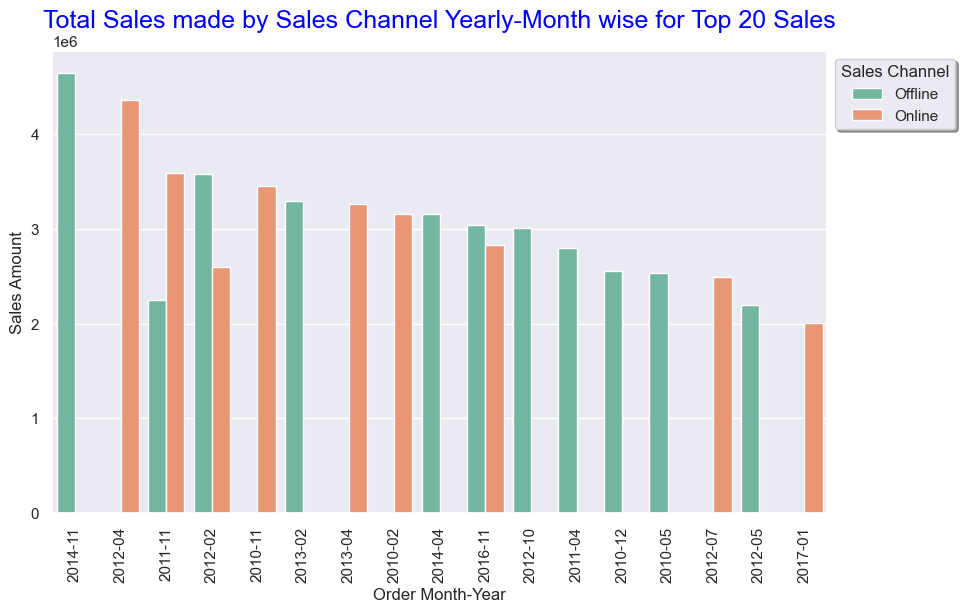

In [44]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Order Month Year', y='Total Revenue', hue='Sales Channel', data=top_20_sales,palette='Set2')

plt.xlabel('Order Month-Year')
plt.ylabel('Sales Amount')
plt.title('Total Sales made by Sales Channel Yearly-Month wise for Top 20 Sales',fontsize=18,color='Blue')

plt.xticks(rotation=90)
plt.legend(title='Sales Channel',bbox_to_anchor=(1,1),shadow=True)

plt.show()

In [45]:
group_channel_units_sold = data_with_no_outliers.groupby('Sales Channel')['Units Sold'].sum().reset_index()

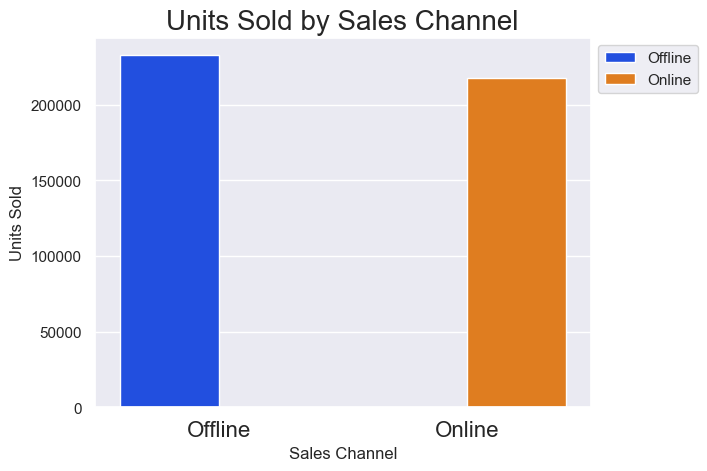

In [46]:
sns.barplot(group_channel_units_sold,x='Sales Channel',y='Units Sold',palette='bright',hue='Sales Channel')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Units Sold by Sales Channel",fontsize=20)
plt.xticks(fontsize=16)
plt.show()

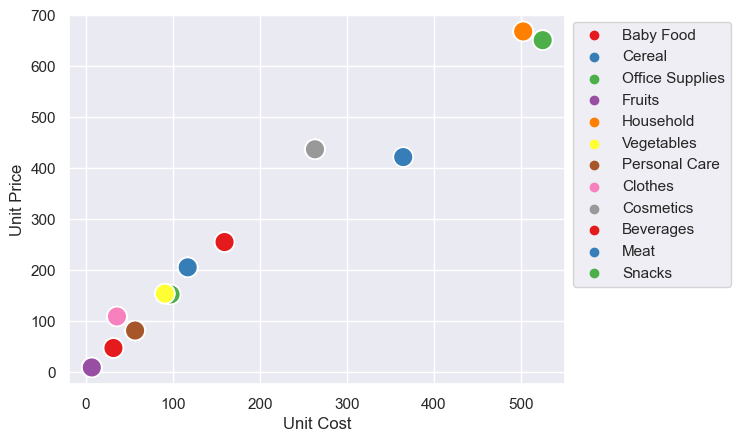

In [47]:
sns.scatterplot(data_with_no_outliers,x='Unit Cost',y='Unit Price',s=200,palette='Set1',hue='Item Type')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [48]:
grouped_item_profit_margin = data_with_no_outliers.groupby('Item Type')['Profit Margin %'].sum().reset_index()

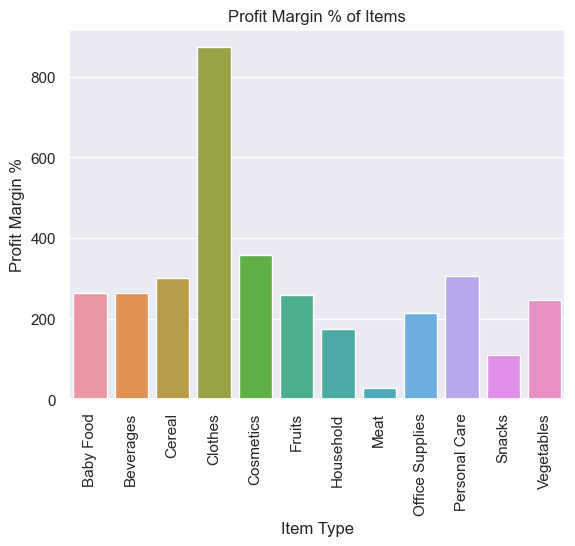

In [49]:
sns.barplot(data=grouped_item_profit_margin,x='Item Type',y='Profit Margin %')
plt.xticks(rotation=90)
plt.title("Profit Margin % of Items")
plt.show()

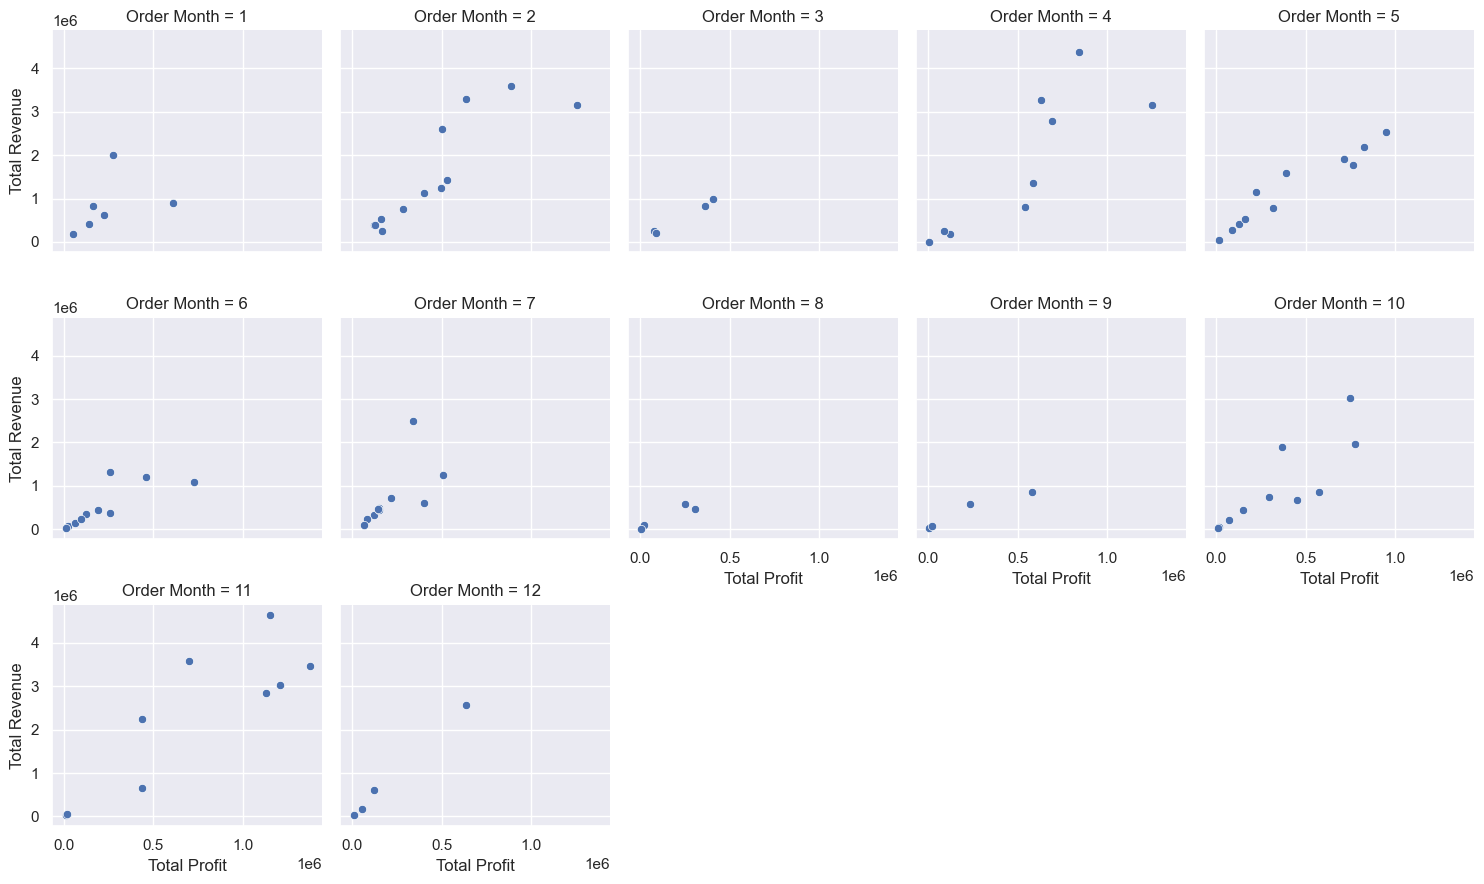

In [50]:
sns.relplot(y ='Total Revenue',x = 'Total Profit', data=data_with_no_outliers,height = 3,aspect=1,col = 'Order Month',col_wrap=5, palette='muted')

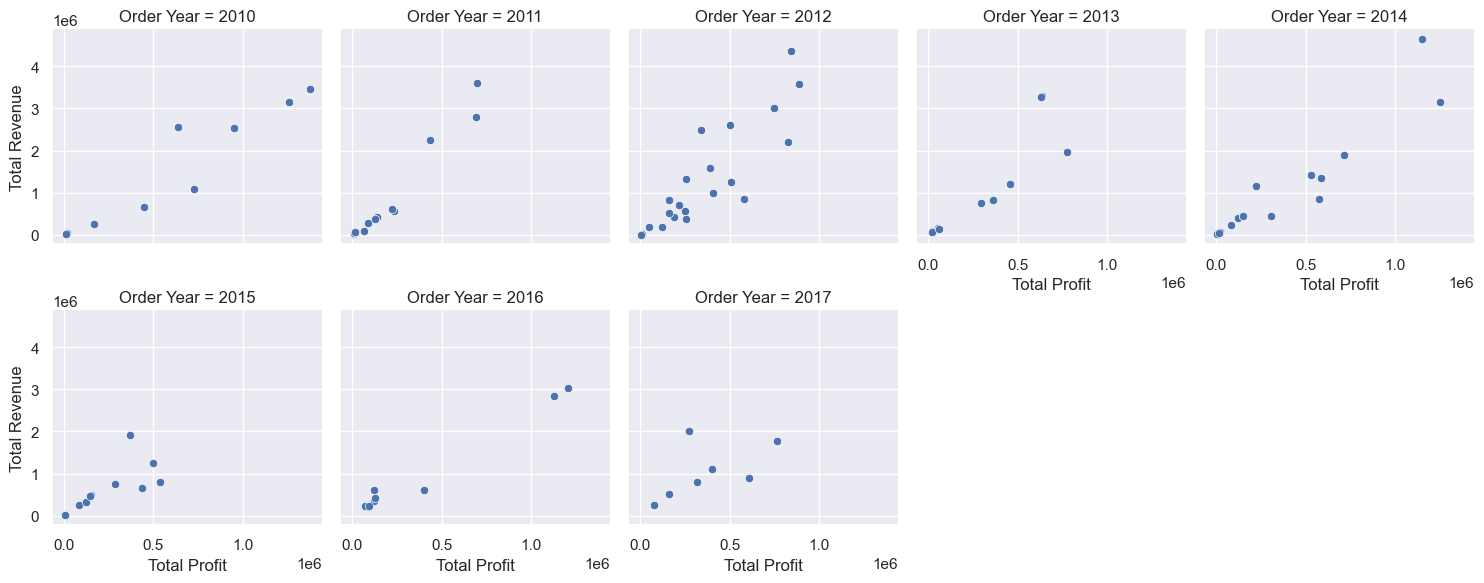

In [51]:
sns.relplot(y ='Total Revenue',x = 'Total Profit', data=data_with_no_outliers,height = 3,aspect=1,col = 'Order Year',col_wrap=5, palette='muted')

In [52]:
group_item = data_with_no_outliers.groupby('Order Year')[['Total Revenue','Units Sold']].sum().reset_index()

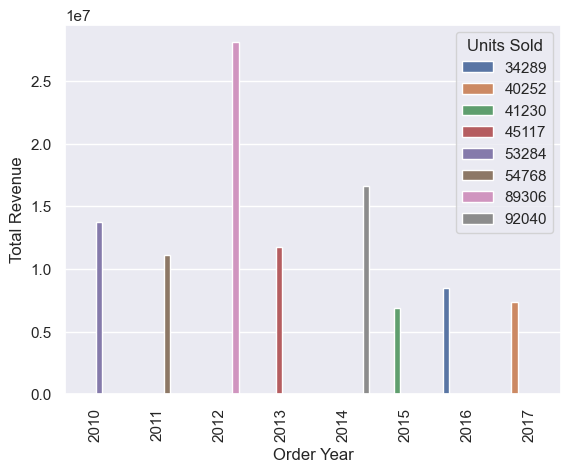

In [53]:
sns.barplot(data=group_item,x='Order Year',y='Total Revenue',hue='Units Sold')
plt.xticks(rotation=90)
plt.show()

# Analyzing the year 2012

In [54]:
data_2012 = data_with_no_outliers[data_with_no_outliers['Order Year']==2012]

In [55]:
group_item_2012 = data_2012.groupby('Item Type')[['Total Profit','Total Revenue','Units Sold']].sum().reset_index()

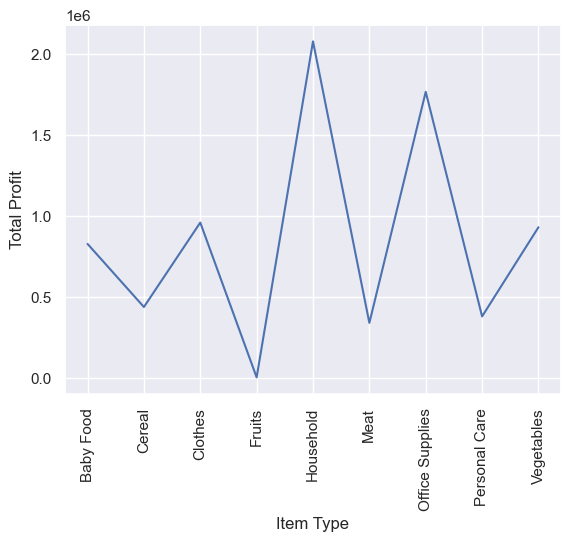

In [56]:
sns.lineplot(data=group_item_2012,x='Item Type',y='Total Profit')
plt.xticks(rotation=90)
plt.show()

#household ,office supplies

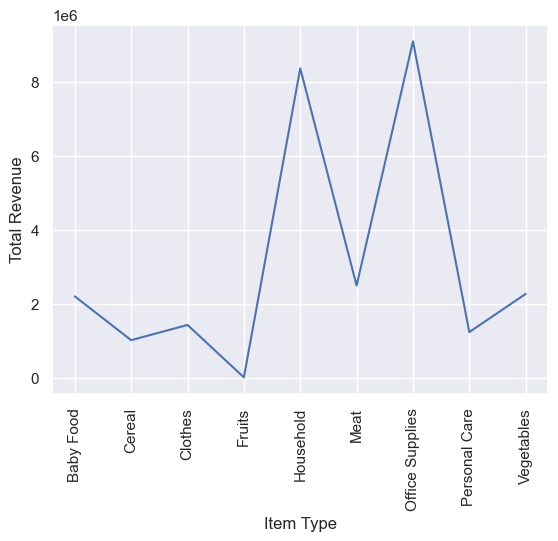

In [57]:
sns.lineplot(data=group_item_2012,x='Item Type',y='Total Revenue')
plt.xticks(rotation=90)
plt.show()

#household ,office supplies

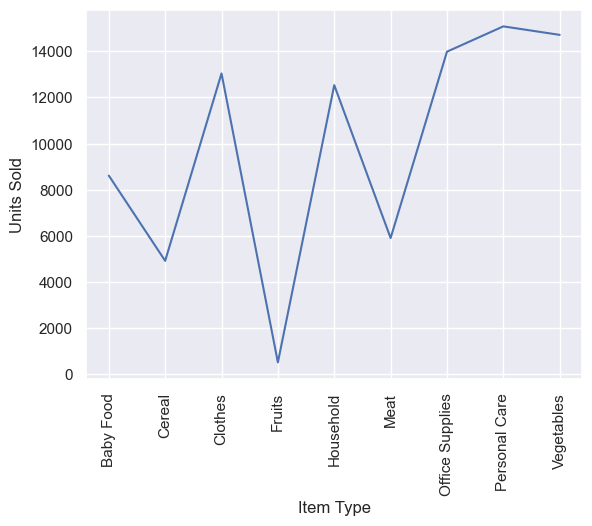

In [58]:
sns.lineplot(data=group_item_2012,x='Item Type',y='Units Sold')
plt.xticks(rotation=90)
plt.show()

#household ,office supplies

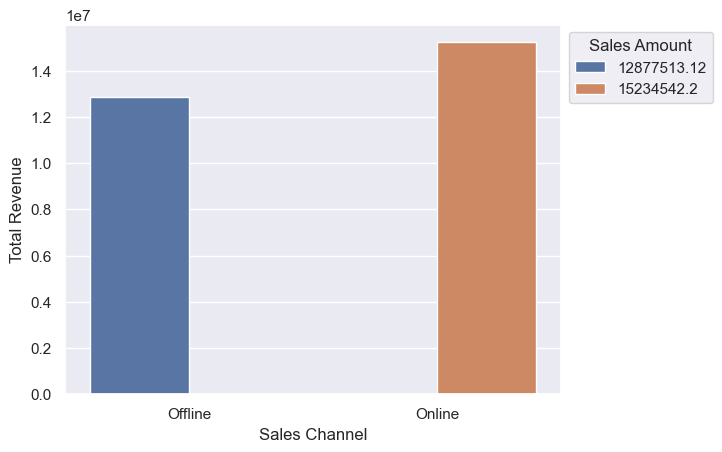

In [59]:
sns.barplot(data = data_2012.groupby('Sales Channel')['Total Revenue'].sum().reset_index(),x='Sales Channel',y='Total Revenue',hue='Total Revenue')
plt.legend(title='Sales Amount',bbox_to_anchor=(1,1))
plt.show()

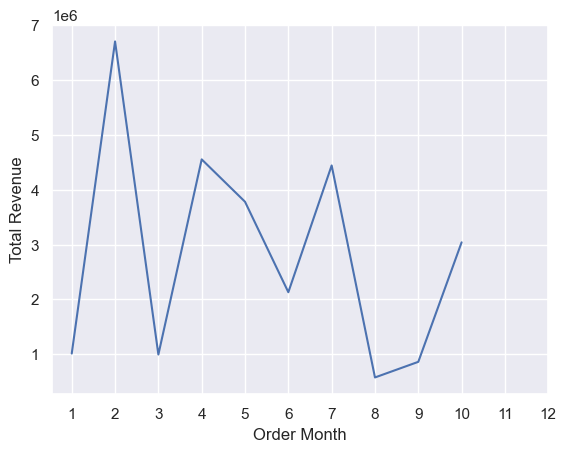

In [60]:
sns.lineplot(data=data_2012.groupby('Order Month')[['Total Profit','Total Revenue','Profit Margin %']].sum(),x='Order Month',y='Total Revenue')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

<Axes: xlabel='Item Type', ylabel='Total Profit'>

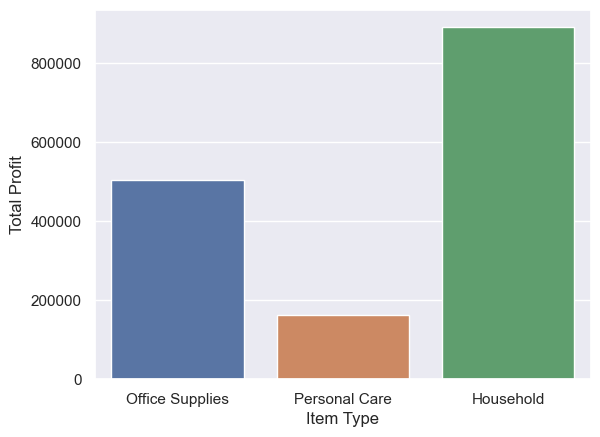

In [61]:
sns.barplot(data=data_2012[data_2012['Order Month']==2],x='Item Type',y='Total Profit')

In [62]:
#saving the data into another file
data_with_no_outliers.to_excel("final_amazon_data.xlsx",index=False)

In [63]:
data_with_no_outliers.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Day,Order Month Year,Profit Margin %
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,28,2010-05,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,22,2012-08,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2,2014-05,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,20,2014-06,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,1,2013-02,19.386987


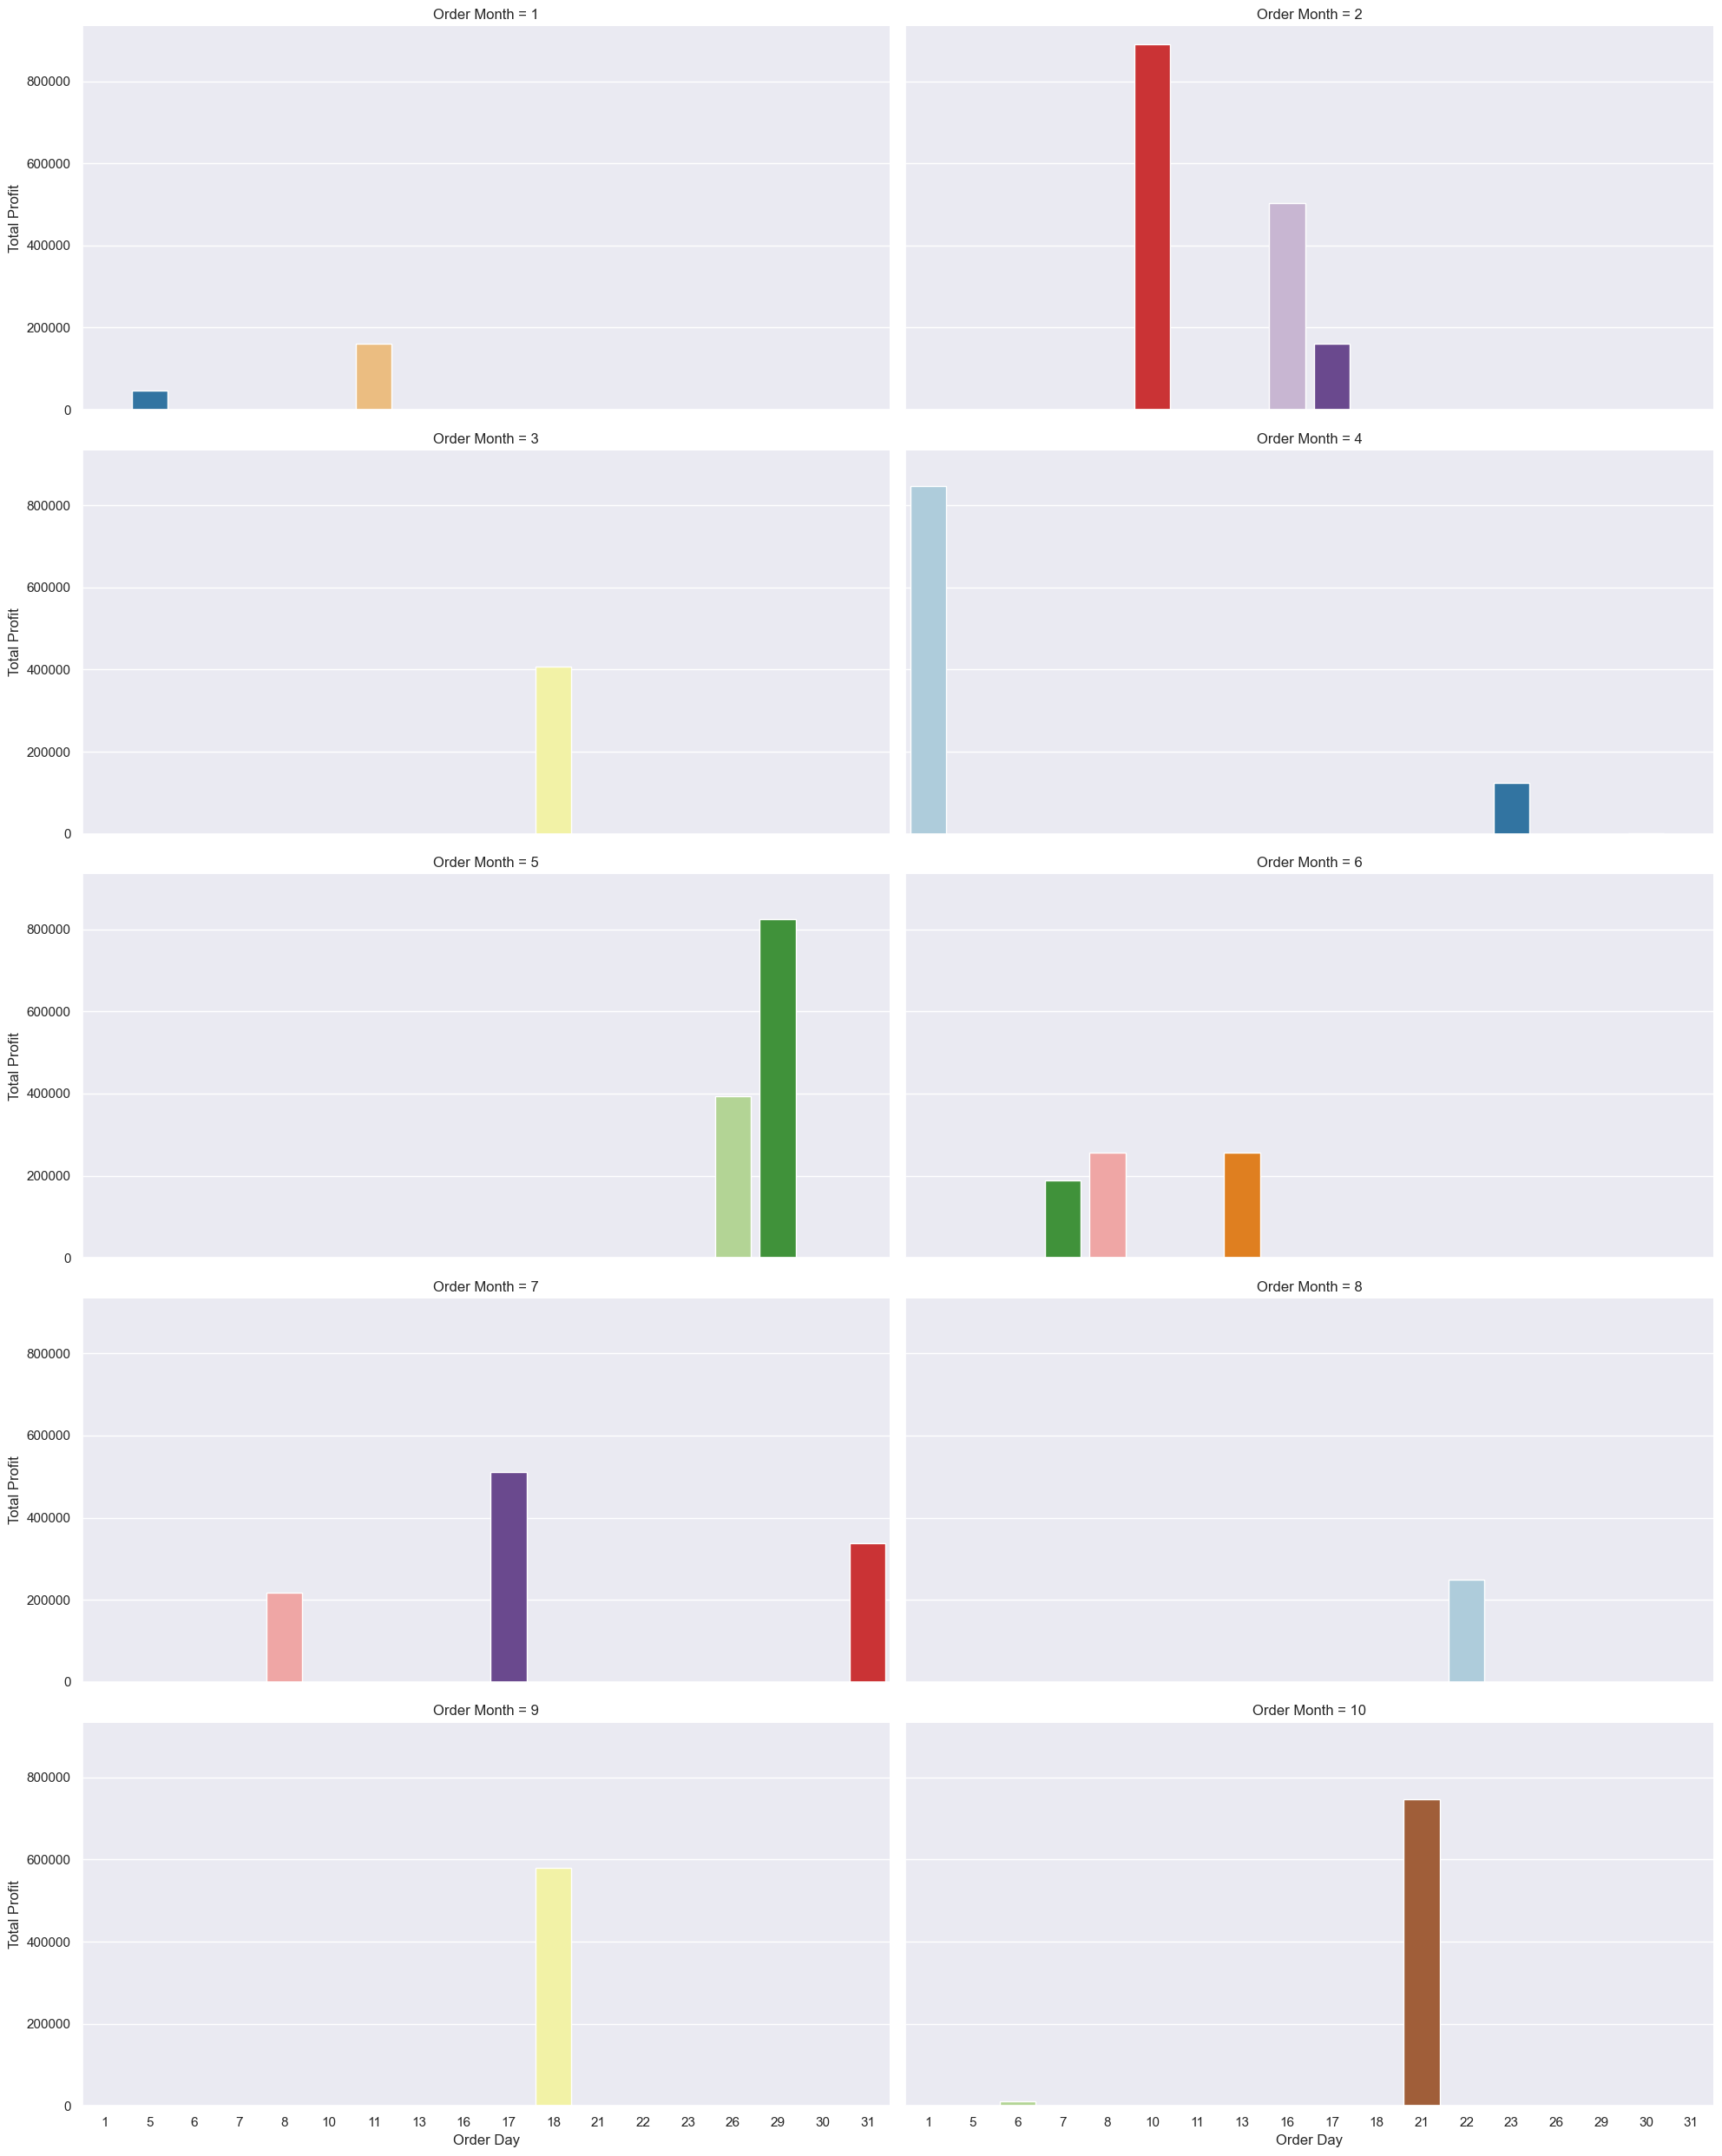

In [64]:
sns.catplot(y = 'Total Profit', x = 'Order Day', data = data_2012, aspect=2,palette='Paired',kind="bar",col='Order Month',col_wrap=2)

Conclusion:
1. Top 5 Items that are sold are Clothes,Office Supplies,Fruits,Personal Care and Cosmetics

2. Clothes,Cosmetics and Personal Care are top 3 Items which have a high Profit Margin %.

3. Countries with highest sales are Mexico,Brunei,Cameroon,Mozambique and Romania.

4. High profits and High Sales were made in the year 2012,2014 and 2010

5. 2010,2011,2012 and 2014 are the year with highest number of units sold.

6.  On average high profits were made in February,April and November month.

7. On average ,sales started dropping after April until September.

8. February 2010(Online),November 2010(Online),April 2014(Ofline) and November 2011(Both) have highest Profit Margin with 39.76% approximately.

9. Online Sales contribute to 51.6% of the Sales whereas Offline contribute to 48.4% of the Sales.

10. With respect to year-month wise which have high profit gains,Both the Channels (Online and Oflfline contributed equally)

11. 2012 is the year in which highest profit and highest Sales were made

# Performing Linear Regression

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data_with_no_outliers[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = data_with_no_outliers['Total Profit']


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
reg = LinearRegression()

# Fit the model on the training data
reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients -\n{reg.coef_}\n")

print(f'Mean Squared Error: {mse}\n 

print(f'R-squared Score: {r2}\n')

print(f"Intercept :{reg.intercept_}\n")

SyntaxError: unterminated string literal (detected at line 27) (4070851205.py, line 27)

Making Predictions

In [ ]:
reg.predict([[9925,255.28,159.42,2533654.0,1582243.50,5,2010]])